In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
data = pd.read_excel("titanic3.xls")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [10]:
#data.shape
# data.columns
# data.head()

In [11]:
 data = data.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'],axis=1)
 data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [12]:
data.describe() # Pour avoir les statistiques de bases du dataset

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [14]:
data = data.dropna(axis=0)
print(data.shape)
data.describe()

(1046, 4)


,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [15]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot:>

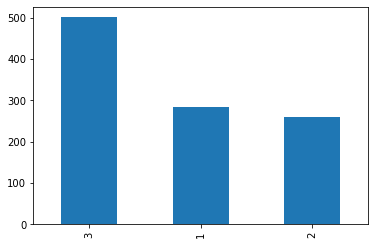

In [16]:
data['pclass'].value_counts().plot.bar()

<AxesSubplot:>

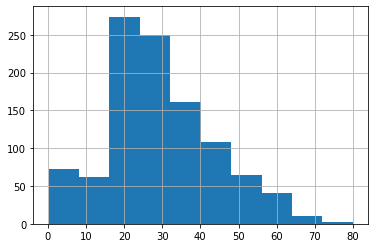

In [24]:
# Repartition des ages selon un histogramme
data['age'].hist()

In [25]:
# Regroupement des gens suivant leur sexes
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [26]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [28]:
# 1. C'est quoi un dataFrame?
'''
Dans pandas, il existe deux structures de donnees: serie et dataframe
- Une serie: c'est un tableau numpy a une colonne auquel on a justapose a gauche les indexs
- Un Dataframe: c'est une justaposition de series les unes a cote des autres
- On peut aussi dire qu'un dataframe est un dictionnaire ayant pour cles les colonnes et pour valeurs les series
'''
# les indexs d'un dataframe son modifiable (differents des index de numpy)
data = data.set_index('pclass')
data['age']

pclass
1    29.0000
1     0.9167
1     2.0000
1    30.0000
1    25.0000
      ...   
3    45.5000
3    14.5000
3    26.5000
3    27.0000
3    29.0000
Name: age, Length: 1046, dtype: float64

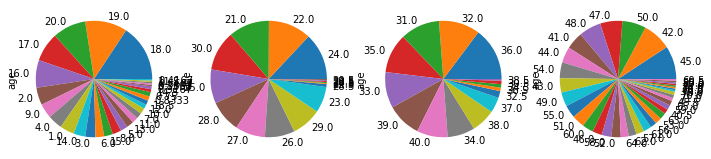

In [65]:
# Exercice
# Modifier la colonne 'age' afin de cree 4 categories:
# - cat0: < 20 ans
# - cat1: 20-30 ans
# - cat2: 30-40 ans
# - cat3: +40 ans
data = pd.read_excel("titanic3.xls")
cat = data['age'] # serie associe a la categorie age
cat0 = cat[cat<=20]
cat1 = cat[(cat>20)&(cat<=30)]
cat2 = cat[(cat>30)&(cat<=40)]
cat3 = cat[cat>40]
categories = [cat0,cat1, cat2, cat3]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(1,4,i+1)
    categories[i].value_counts().plot.pie()
plt.show()

In [67]:
# Solution

data.loc[data['age'] <= 20, 'age'] = 0
data.loc[(data['age'] > 20) & (data['age'] <= 30), 'age'] = 1
data.loc[(data['age'] > 30) & (data['age'] <= 40), 'age'] = 2
data.loc[data['age'] > 40, 'age'] = 3
data['age'].value_counts()

1.0    361
0.0    248
3.0    227
2.0    210
Name: age, dtype: int64

<AxesSubplot:ylabel='age'>

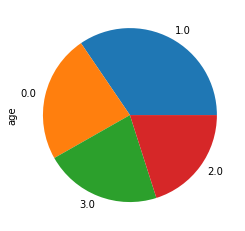

In [68]:
data['age'].value_counts().plot.pie()

In [60]:
data.groupby(['age']).mean()

,pclass,survived,sibsp,parch,fare,body
age,,,,,,
0.0,2.568548,0.459677,0.991935,0.745968,29.025169,148.214286
1.0,2.371191,0.371191,0.326870,0.218837,28.159013,170.393939
2.0,2.109524,0.423810,0.361905,0.414286,42.701507,155.343750
3.0,1.643172,0.396476,0.378855,0.392070,53.123858,161.853659


In [63]:
# dans une colonnes, lorsqu'il ya plussieurs categories qu'on cherches a convertir en categories numeriques, on fait simplement:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8